In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
oil_df = pd.read_csv("oil.csv")
holidays_df = pd.read_csv("holidays_events.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
transactions_df = pd.read_csv("transactions.csv")

In [42]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [145]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [44]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [45]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [46]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [47]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [48]:
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [49]:
train_df.duplicated().sum()

0

In [50]:
round(train_df.describe(), 2)

,id,store_nbr,sales,onpromotion
count,3000888.00,3000888.00,3000888.00,3000888.00
mean,1500443.50,27.50,357.78,34.60
std,866281.89,15.59,1102.00,99.48
min,0.00,1.00,0.00,0.00
25%,750221.75,14.00,0.00,0.00
50%,1500443.50,27.50,11.00,1.00
75%,2250665.25,41.00,195.85,16.00
max,3000887.00,54.00,124717.00,1006.00


In [51]:
train_df.id.nunique()

3000888

In [53]:
round(train_df.sales.describe(), 2)

count    3000888.00
mean         357.78
std         1102.00
min            0.00
25%            0.00
50%           11.00
75%          195.85
max       124717.00
Name: sales, dtype: float64

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 137.4+ MB


In [55]:
train_df['date'] = pd.to_datetime(train_df['date'],  errors='coerce')

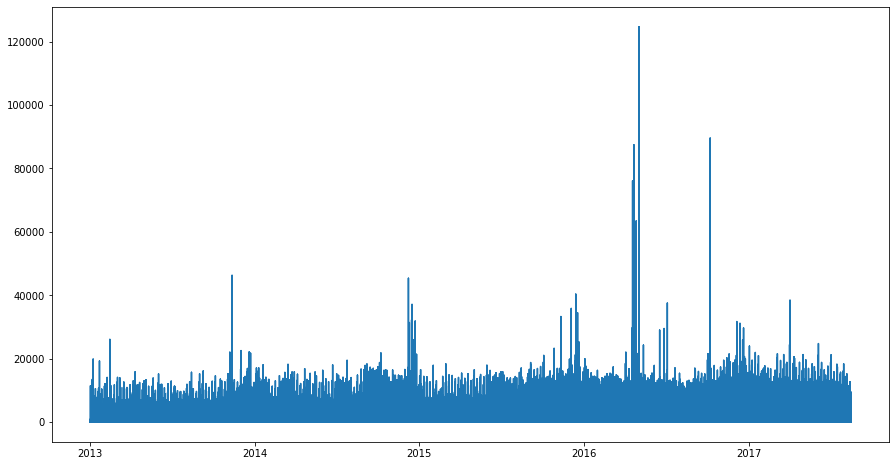

In [57]:
plt.figure(figsize=(15,8))
plt.plot(train_df.date, train_df.sales)
plt.show()

In [59]:
months_sales = train_df.groupby(train_df['date'].dt.strftime('%B'))['sales'].sum().sort_values()

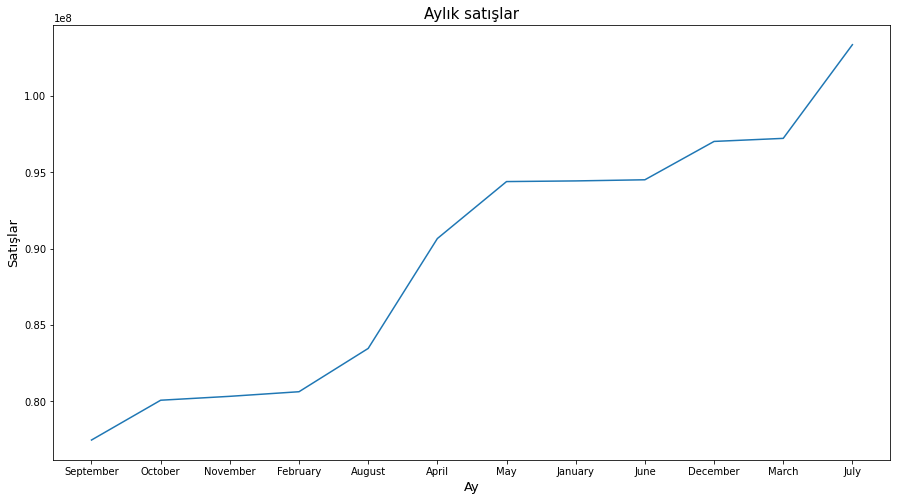

In [60]:
plt.figure(figsize=(15,8))
plt.plot(months_sales)
plt.title("Aylık satışlar", fontsize=15)
plt.xlabel("Ay", fontsize=13)
plt.ylabel("Satışlar", fontsize=13)
plt.show()

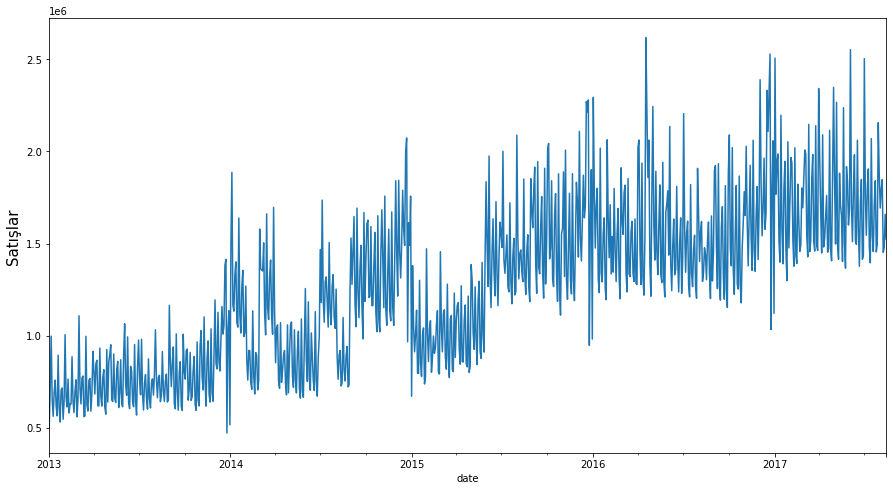

In [61]:
plt.figure(figsize=(15,8))
train_df.groupby(pd.Grouper(key='date', freq='2D')).sum()['sales'].plot()
plt.ylabel("Satışlar ", fontsize=15)
plt.show()

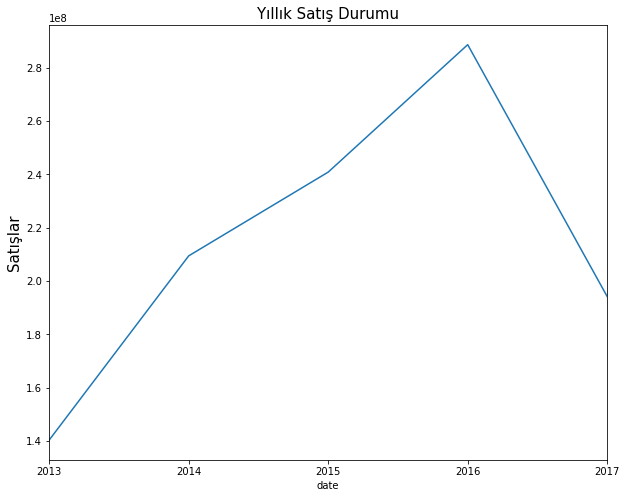

In [62]:
plt.figure(figsize=(10,8))
train_df.groupby(pd.Grouper(key='date', freq='1Y')).sum()['sales'].plot()
plt.title("Yıllık Satış Durumu", fontsize=15)
plt.ylabel("Satışlar", fontsize=15)
plt.show()

In [63]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0


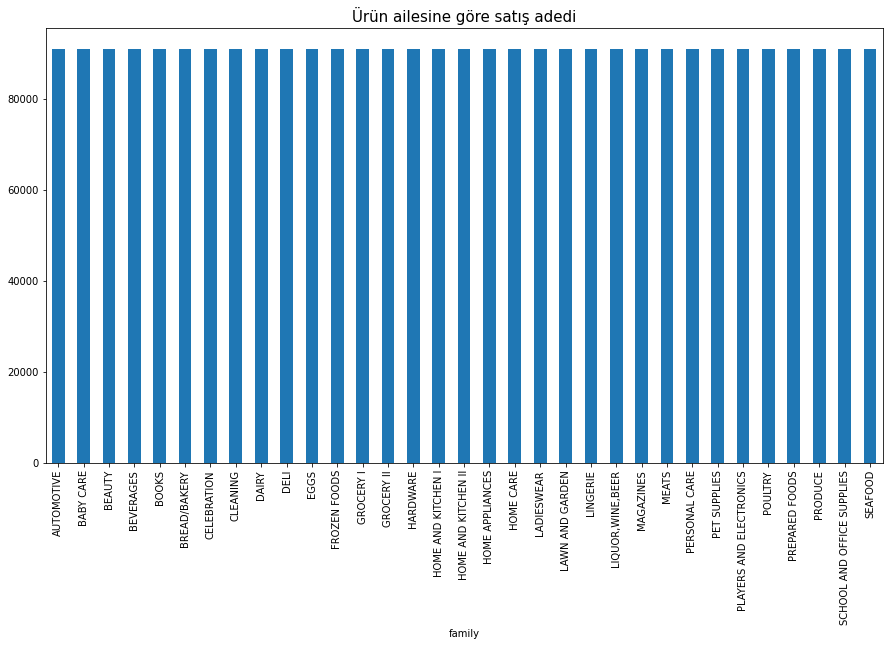

In [64]:
plt.figure(figsize=(15, 8))
train_df.groupby("family")['family'].count().plot(kind='bar')
plt.title("Ürün ailesine göre satış adedi", fontsize=15)
plt.show()

In [65]:
months_pormotions = train_df.groupby(train_df['date'].dt.strftime('%B'))['onpromotion'].sum().sort_values()

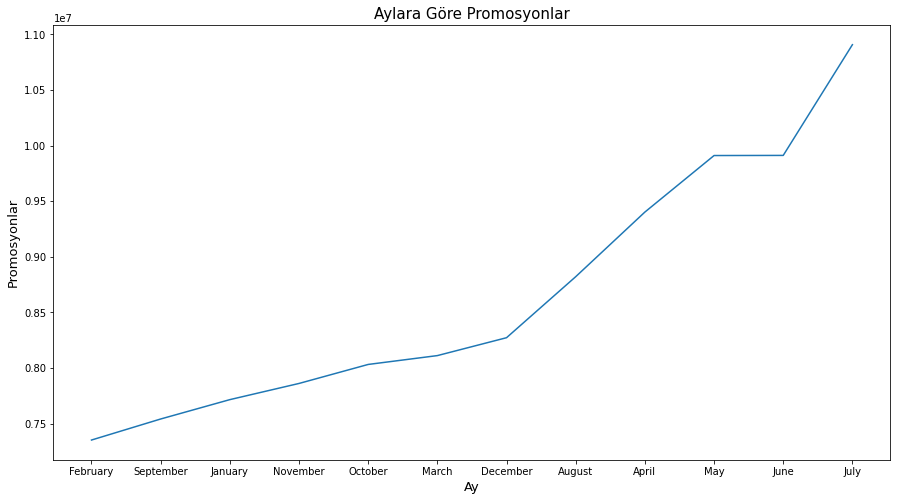

In [67]:
plt.figure(figsize=(15,8))
plt.plot(months_pormotions)
plt.title("Aylara Göre Promosyonlar", fontsize=15)

plt.xlabel("Ay", fontsize=13)
plt.ylabel("Promosyonlar", fontsize=13)
plt.show()

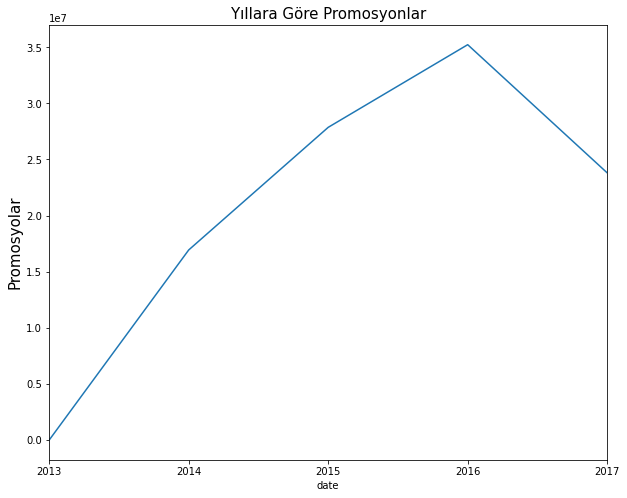

In [68]:
plt.figure(figsize=(10,8))
train_df.groupby(pd.Grouper(key='date', freq='1Y')).sum()['onpromotion'].plot()
plt.title("Yıllara Göre Promosyonlar", fontsize=15)
plt.ylabel("Promosyolar", fontsize=15)
plt.show()

In [69]:
stores_sales = train_df.groupby('store_nbr')['sales'].sum()

In [70]:
stores_sales.sort_values(inplace=True)

In [71]:
round(stores_sales, 2)

store_nbr
52     2696169.73
22     4090201.74
32     5951796.00
30     7382073.66
35     7676679.42
26     7755121.89
42     8945767.89
21     9255505.91
10     9613905.74
29     9725157.70
13    10523045.82
12    10659217.96
16    10986412.55
54    11057483.12
53    11216167.28
14    11387918.75
25    11420997.87
15    11451270.02
23    11651380.67
20    12920954.59
19    13049509.84
18    13259375.69
1     14145012.87
33    14178501.29
41    14991039.14
36    15322431.10
5     15592404.57
43    16391692.21
34    17090734.16
31    17746872.70
17    18030969.25
28    18383154.83
40    18395757.41
38    18859999.26
4     18909700.38
27    19188021.38
37    19970635.61
39    20252192.53
2     21557388.64
24    23767732.70
6     25183680.00
9     26409441.06
7     26952049.58
11    28325558.48
50    28653020.62
8     30494286.93
51    32911489.54
48    35933130.27
46    41896062.12
49    43420095.78
3     50481910.19
47    50948310.06
45    54498010.42
44    62087553.25
Name: sales, dtype

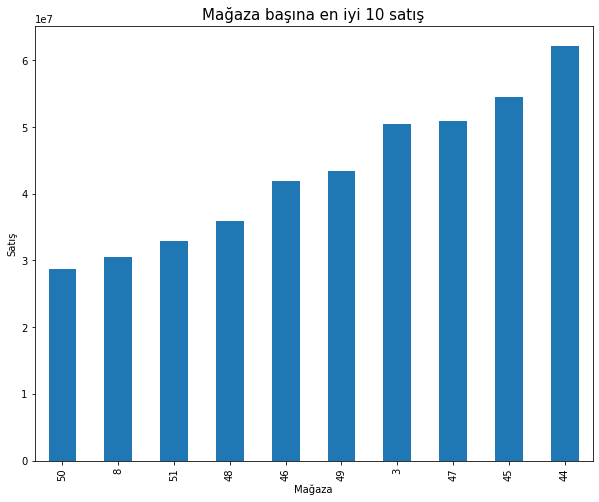

In [73]:
plt.figure(figsize=(10, 8))
stores_sales[-10:].plot(kind='bar')
plt.title("Mağaza başına en iyi 10 satış", fontsize=15)
plt.xlabel("Mağaza")
plt.ylabel("Satış")
plt.show()

In [74]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [75]:
stores_df.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [76]:
sales_nums = stores_sales.index

In [77]:
top_stores = sales_nums[-10:]

In [78]:
cities = []
i = 0
for city in stores_df.city:
    if stores_df.store_nbr[i] in  top_stores:
        cities.append(stores_df.city[i])
    i += 1

In [79]:
cities

['Quito',
 'Quito',
 'Quito',
 'Quito',
 'Quito',
 'Quito',
 'Quito',
 'Quito',
 'Ambato',
 'Guayaquil']

In [80]:
cities = np.array(cities)
cities = pd.Series(cities)

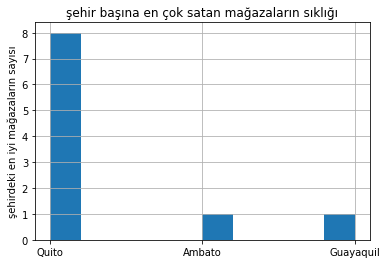

In [82]:
cities.hist()
plt.title("şehir başına en çok satan mağazaların sıklığı")
plt.ylabel("şehirdeki en iyi mağazaların sayısı")
plt.show()

# MODELING

## DecisionTreeRegressor

In [126]:
train_df.date = pd.to_numeric(train_df.date)

In [127]:

#KÜTÜPHANELER

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [128]:
le = LabelEncoder()
train_df.family = le.fit_transform(train_df.family)

In [129]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,1356998400000000000,1,0,0.0,0.0
1,1,1356998400000000000,1,1,0.0,0.0


In [130]:
X = train_df.drop(['sales', 'id', 'date'], axis = 1).values
y = train_df.sales.values

In [131]:
X.shape

(3000888, 3)

In [132]:
y.shape

(3000888,)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [134]:
regressor = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=12, random_state=42)

In [135]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=12, random_state=42)

In [136]:
regressor.score(X_train, y_train)

0.663494706816192

In [137]:
regressor.score(X_test, y_test)

0.6563814090619251

# Linear Regression

In [107]:
Score: 56



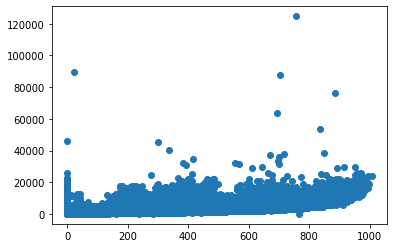

In [96]:
plt.scatter(train_df.onpromotion, train_df.sales)

In [97]:
train_df.corr()

,id,date,store_nbr,family,sales,onpromotion
id,1.000000,9.999997e-01,3.013308e-04,1.099169e-05,0.085784,0.213851
date,1.000000,1.000000e+00,3.587512e-16,1.489755e-16,0.085728,0.213821
store_nbr,0.000301,3.587512e-16,1.000000e+00,0.000000e+00,0.041196,0.002442
family,0.000011,1.489755e-16,0.000000e+00,1.000000e+00,-0.114159,-0.148262
sales,0.085784,8.572780e-02,4.119605e-02,-1.141591e-01,1.000000,0.755648
onpromotion,0.213851,2.138210e-01,2.442236e-03,-1.482616e-01,0.755648,1.000000


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
regressor2 = LinearRegression()

In [100]:
train_df.iloc[:,-1:]

,onpromotion
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3000883,15.0
3000884,8.0
3000885,148.0
3000886,10.0


In [101]:
X = train_df.iloc[:,-1:].values
y = train_df.sales.values

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [103]:
regressor2.fit(X_train, y_train)

LinearRegression()

In [104]:
regressor2.score(X_test, y_test)

0.566764149205117

In [105]:
regressor2.score(X_train, y_train)

0.5717639844661447

# XGBoost Regressor



In [162]:
import xgboost as xg

In [163]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123, max_depth=10)

In [164]:
xgb_r.fit(X_train, y_train)

[16:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [165]:
xgb_r.score(X_test, y_test)

0.8867356645038273

In [166]:
xgb_r.score(X_train, y_train)

0.8967767660521007

# PREDICTIONS  - xgboost and decisiontree

In [142]:
test_df.head(2)

,id,sales
0,3000888,101.26637
1,3000889,101.26637


In [146]:
test_df.family = le.fit_transform(test_df.family)

In [147]:
test_df.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,0,20.0
1,3000889,2017-08-16,1,1,1.0


In [148]:
X = test_df.drop(["id", "date"], axis=1).values
X.shape

(28512, 3)

In [149]:
X[0]


array([ 1.,  0., 20.])

In [150]:
 predictions = regressor.predict(X)

In [151]:
test_df['sales'] = predictions

In [152]:
test_df.head(2)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,0,20.0,101.26637
1,3000889,2017-08-16,1,1,1.0,101.26637


In [153]:
test_df.drop(['store_nbr', 'family', 'onpromotion', 'date'], axis=1, inplace=True)

In [154]:
test_df.head(2)

,id,sales
0,3000888,101.26637
1,3000889,101.26637


In [155]:
test_df.to_csv('submission.csv', index=False)
print("submission successed")

submission successed


# catboost

In [172]:
!pip install catboost

You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [173]:
import catboost as cxg

In [178]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)



In [179]:
# Fit model
model.fit(X_train, y_train)


0:	learn: 770.1372644	total: 232ms	remaining: 232ms
1:	learn: 746.6654309	total: 379ms	remaining: 0us


In [180]:
X = train_df.iloc[:,-1:].values
y = train_df.sales.values

In [181]:
X.shape

(3000888, 1)

In [183]:
y.shape

(3000888,)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [218]:
regressor3 = CatBoostRegressor()

In [219]:
regressor3.fit(X_train, y_train)

Learning rate set to 0.141395
0:	learn: 1012.1349589	total: 243ms	remaining: 4m 2s
1:	learn: 941.2598796	total: 469ms	remaining: 3m 54s
2:	learn: 884.8955662	total: 707ms	remaining: 3m 55s
3:	learn: 840.4792697	total: 954ms	remaining: 3m 57s
4:	learn: 806.1119239	total: 1.18s	remaining: 3m 54s
5:	learn: 779.3363514	total: 1.41s	remaining: 3m 53s
6:	learn: 758.7227277	total: 1.63s	remaining: 3m 51s
7:	learn: 743.0250703	total: 1.86s	remaining: 3m 50s
8:	learn: 730.9653722	total: 2.11s	remaining: 3m 52s
9:	learn: 721.8953431	total: 2.36s	remaining: 3m 54s
10:	learn: 714.8615862	total: 2.59s	remaining: 3m 52s
11:	learn: 709.7460051	total: 2.82s	remaining: 3m 52s
12:	learn: 705.8217203	total: 3.06s	remaining: 3m 51s
13:	learn: 702.7599980	total: 3.3s	remaining: 3m 52s
14:	learn: 700.5139214	total: 3.53s	remaining: 3m 51s
15:	learn: 698.7905660	total: 3.76s	remaining: 3m 51s
16:	learn: 697.4154789	total: 4.01s	remaining: 3m 51s
17:	learn: 696.3077275	total: 4.25s	remaining: 3m 51s
18:	learn

152:	learn: 691.5961410	total: 36.8s	remaining: 3m 23s
153:	learn: 691.5945342	total: 37.1s	remaining: 3m 23s
154:	learn: 691.5938448	total: 37.3s	remaining: 3m 23s
155:	learn: 691.5929010	total: 37.5s	remaining: 3m 23s
156:	learn: 691.5917986	total: 37.8s	remaining: 3m 22s
157:	learn: 691.5904548	total: 38s	remaining: 3m 22s
158:	learn: 691.5886247	total: 38.3s	remaining: 3m 22s
159:	learn: 691.5867879	total: 38.5s	remaining: 3m 22s
160:	learn: 691.5856442	total: 38.7s	remaining: 3m 21s
161:	learn: 691.5843975	total: 39s	remaining: 3m 21s
162:	learn: 691.5829666	total: 39.2s	remaining: 3m 21s
163:	learn: 691.5824311	total: 39.5s	remaining: 3m 21s
164:	learn: 691.5814387	total: 39.7s	remaining: 3m 21s
165:	learn: 691.5801991	total: 40s	remaining: 3m 20s
166:	learn: 691.5791191	total: 40.2s	remaining: 3m 20s
167:	learn: 691.5786081	total: 40.4s	remaining: 3m 20s
168:	learn: 691.5783528	total: 40.6s	remaining: 3m 19s
169:	learn: 691.5772206	total: 40.9s	remaining: 3m 19s
170:	learn: 691.

303:	learn: 691.5204770	total: 1m 15s	remaining: 2m 53s
304:	learn: 691.5204213	total: 1m 15s	remaining: 2m 53s
305:	learn: 691.5203751	total: 1m 16s	remaining: 2m 52s
306:	learn: 691.5202578	total: 1m 16s	remaining: 2m 52s
307:	learn: 691.5200223	total: 1m 16s	remaining: 2m 52s
308:	learn: 691.5199964	total: 1m 16s	remaining: 2m 51s
309:	learn: 691.5198111	total: 1m 17s	remaining: 2m 51s
310:	learn: 691.5196788	total: 1m 17s	remaining: 2m 51s
311:	learn: 691.5195422	total: 1m 17s	remaining: 2m 51s
312:	learn: 691.5194262	total: 1m 18s	remaining: 2m 51s
313:	learn: 691.5193355	total: 1m 18s	remaining: 2m 50s
314:	learn: 691.5191206	total: 1m 18s	remaining: 2m 50s
315:	learn: 691.5188525	total: 1m 18s	remaining: 2m 50s
316:	learn: 691.5185923	total: 1m 19s	remaining: 2m 50s
317:	learn: 691.5184337	total: 1m 19s	remaining: 2m 50s
318:	learn: 691.5183156	total: 1m 19s	remaining: 2m 49s
319:	learn: 691.5182676	total: 1m 19s	remaining: 2m 49s
320:	learn: 691.5182122	total: 1m 20s	remaining:

450:	learn: 691.5079306	total: 1m 55s	remaining: 2m 21s
451:	learn: 691.5079069	total: 1m 56s	remaining: 2m 20s
452:	learn: 691.5078409	total: 1m 56s	remaining: 2m 20s
453:	learn: 691.5078366	total: 1m 56s	remaining: 2m 20s
454:	learn: 691.5078227	total: 1m 57s	remaining: 2m 20s
455:	learn: 691.5078031	total: 1m 57s	remaining: 2m 19s
456:	learn: 691.5077596	total: 1m 57s	remaining: 2m 19s
457:	learn: 691.5077263	total: 1m 57s	remaining: 2m 19s
458:	learn: 691.5077072	total: 1m 58s	remaining: 2m 19s
459:	learn: 691.5076504	total: 1m 58s	remaining: 2m 19s
460:	learn: 691.5076205	total: 1m 58s	remaining: 2m 18s
461:	learn: 691.5076050	total: 1m 59s	remaining: 2m 18s
462:	learn: 691.5075893	total: 1m 59s	remaining: 2m 18s
463:	learn: 691.5075670	total: 1m 59s	remaining: 2m 18s
464:	learn: 691.5075423	total: 2m	remaining: 2m 18s
465:	learn: 691.5075136	total: 2m	remaining: 2m 17s
466:	learn: 691.5074934	total: 2m	remaining: 2m 17s
467:	learn: 691.5074127	total: 2m	remaining: 2m 17s
468:	lea

599:	learn: 691.5050029	total: 2m 38s	remaining: 1m 45s
600:	learn: 691.5049932	total: 2m 38s	remaining: 1m 45s
601:	learn: 691.5049876	total: 2m 39s	remaining: 1m 45s
602:	learn: 691.5049719	total: 2m 39s	remaining: 1m 44s
603:	learn: 691.5049591	total: 2m 39s	remaining: 1m 44s
604:	learn: 691.5049544	total: 2m 39s	remaining: 1m 44s
605:	learn: 691.5049408	total: 2m 40s	remaining: 1m 44s
606:	learn: 691.5049254	total: 2m 40s	remaining: 1m 43s
607:	learn: 691.5049172	total: 2m 40s	remaining: 1m 43s
608:	learn: 691.5049055	total: 2m 41s	remaining: 1m 43s
609:	learn: 691.5049025	total: 2m 41s	remaining: 1m 43s
610:	learn: 691.5048970	total: 2m 41s	remaining: 1m 42s
611:	learn: 691.5048889	total: 2m 41s	remaining: 1m 42s
612:	learn: 691.5048760	total: 2m 42s	remaining: 1m 42s
613:	learn: 691.5048681	total: 2m 42s	remaining: 1m 42s
614:	learn: 691.5048611	total: 2m 42s	remaining: 1m 41s
615:	learn: 691.5048420	total: 2m 43s	remaining: 1m 41s
616:	learn: 691.5048182	total: 2m 43s	remaining:

747:	learn: 691.5041922	total: 3m 19s	remaining: 1m 7s
748:	learn: 691.5041874	total: 3m 20s	remaining: 1m 7s
749:	learn: 691.5041836	total: 3m 20s	remaining: 1m 6s
750:	learn: 691.5041762	total: 3m 20s	remaining: 1m 6s
751:	learn: 691.5041745	total: 3m 20s	remaining: 1m 6s
752:	learn: 691.5041702	total: 3m 21s	remaining: 1m 6s
753:	learn: 691.5041616	total: 3m 21s	remaining: 1m 5s
754:	learn: 691.5041608	total: 3m 21s	remaining: 1m 5s
755:	learn: 691.5041571	total: 3m 22s	remaining: 1m 5s
756:	learn: 691.5041530	total: 3m 22s	remaining: 1m 4s
757:	learn: 691.5041482	total: 3m 22s	remaining: 1m 4s
758:	learn: 691.5041465	total: 3m 22s	remaining: 1m 4s
759:	learn: 691.5041426	total: 3m 23s	remaining: 1m 4s
760:	learn: 691.5041364	total: 3m 23s	remaining: 1m 3s
761:	learn: 691.5041312	total: 3m 23s	remaining: 1m 3s
762:	learn: 691.5041300	total: 3m 23s	remaining: 1m 3s
763:	learn: 691.5041243	total: 3m 24s	remaining: 1m 3s
764:	learn: 691.5041226	total: 3m 24s	remaining: 1m 2s
765:	learn

897:	learn: 691.5039112	total: 3m 59s	remaining: 27.2s
898:	learn: 691.5039097	total: 3m 59s	remaining: 26.9s
899:	learn: 691.5039094	total: 4m	remaining: 26.7s
900:	learn: 691.5039087	total: 4m	remaining: 26.4s
901:	learn: 691.5039073	total: 4m	remaining: 26.1s
902:	learn: 691.5039065	total: 4m	remaining: 25.9s
903:	learn: 691.5039061	total: 4m 1s	remaining: 25.6s
904:	learn: 691.5039044	total: 4m 1s	remaining: 25.3s
905:	learn: 691.5039028	total: 4m 1s	remaining: 25.1s
906:	learn: 691.5039010	total: 4m 1s	remaining: 24.8s
907:	learn: 691.5039008	total: 4m 2s	remaining: 24.5s
908:	learn: 691.5039002	total: 4m 2s	remaining: 24.3s
909:	learn: 691.5039000	total: 4m 2s	remaining: 24s
910:	learn: 691.5039000	total: 4m 3s	remaining: 23.7s
911:	learn: 691.5038987	total: 4m 3s	remaining: 23.5s
912:	learn: 691.5038968	total: 4m 3s	remaining: 23.2s
913:	learn: 691.5038962	total: 4m 3s	remaining: 22.9s
914:	learn: 691.5038957	total: 4m 3s	remaining: 22.7s
915:	learn: 691.5038951	total: 4m 4s	rem

In [220]:
regressor3.score(X_train, y_train)

0.6052311670138946

In [221]:
regressor3.score(X_test, y_test)

0.5997986347376354

# PREDICTIONS - Catboost

In [222]:
test_df.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0


In [223]:
test_df.family = le.fit_transform(test_df.family)

In [224]:
test_df.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,0,20.0
1,3000889,2017-08-16,1,1,1.0


In [225]:
X = test_df.drop(["id", "date"], axis=1).values
X.shape

(28512, 3)

In [226]:
X[0]

array([ 1.,  0., 20.])

In [227]:
 predictions = regressor3.predict(X)

In [228]:
test_df['sales'] = predictions

In [229]:
test_df.head(2)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,0,20.0,2.371102
1,3000889,2017-08-16,1,1,1.0,2.371102


In [230]:
test_df.to_csv('catboostsubmission.csv', index=False)
print("submission successed")

submission successed
